<a href="https://colab.research.google.com/github/cxbxmxcx/GenReality/blob/master/GEN_8_ProGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title INSTALLS
!pip install pro-gan-pth --quiet

In [ ]:
#@title IMPORTS
import glob
import os
import sys
import torch as th
import torchvision as tv
import pro_gan_pytorch.PRO_GAN as pg

import threading
import multiprocessing
import time
import sys
from IPython.utils import io
from IPython.display import clear_output

In [ ]:
running = True
data_path = "cifar-10/"

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def visualise_output(path, x, y):
    img = mpimg.imread(path)
    plt.figure(figsize=(x,y))
    plt.imshow(img)  
    plt.show()

In [ ]:
def get_latest_file(path):
  list_of_files = glob.glob(path + "/*.png") 
  if len(list_of_files) > 0:
    return max(list_of_files, key=os.path.getctime)
  else:
    return None

In [ ]:
def setup_data(download=False):
    """
    setup the CIFAR-10 dataset for training the CNN
    :param batch_size: batch_size for sgd
    :param num_workers: num_readers for data reading
    :param download: Boolean for whether to download the data
    :return: classes, trainloader, testloader => training and testing data loaders
    """
    # data setup:
    classes = ('plane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck')

    transforms = tv.transforms.ToTensor()

    trainset = tv.datasets.CIFAR10(root=data_path,
                                   transform=transforms,
                                   download=download)

    testset = tv.datasets.CIFAR10(root=data_path,
                                  transform=transforms, train=False,
                                  download=False)

    return classes, trainset, testset

In [ ]:
samples_folder = 'samples'
os.makedirs(samples_folder, exist_ok=True)

In [ ]:
def check_output():
  print("rendering output loop - started") 
  folder = './samples'
  while running:
    time.sleep(15)    
    file = get_latest_file(folder)       
    if file:
      clear_output()
      print(file)
      visualise_output(file,10,10)      

In [ ]:
def train_gan():
  print("training gan - started")
  device = th.device("cuda" if th.cuda.is_available() else "cpu")  
  print(device, data_path)
  # some parameters:
  depth = 4
  # hyper-parameters per depth (resolution)
  num_epochs = [20, 30, 40, 50]
  fade_ins = [50, 50, 50, 50]
  batch_sizes = [128, 128, 128, 128]
  latent_size = 128

  # get the data. Ignore the test data and their classes
  _, dataset, _ = setup_data(download=True)

  # ======================================================================
  # This line creates the PRO-GAN
  # ======================================================================
  pro_gan = pg.ConditionalProGAN(num_classes=10, depth=depth, 
                                  latent_size=latent_size, device=device)
  with io.capture_output() as captured:
    pro_gan.train(
        dataset=dataset,
        epochs=num_epochs,
        fade_in_percentage=fade_ins,
        batch_sizes=batch_sizes
        )  

./samples/gen_3_50_348.png


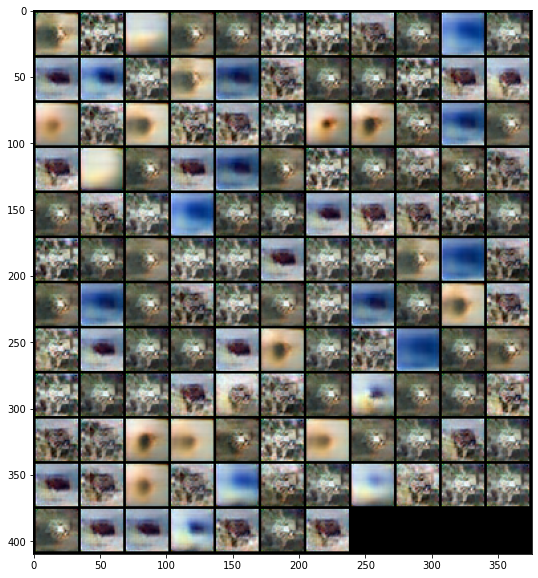

We are at the end of the program. Time Taken: 6616.777097225189


In [ ]:
t1 = threading.Thread(target=train_gan)
p = multiprocessing.Process(target=check_output)

start = time.time()
p.start()
t1.start()

t1.join()
print(f"We are at the end of the program. Time Taken: {time.time() - start}")